<h1>Nós do grupo 1 pensamos em fazer um relatório sobre vinho, pois temos amigos e familiares próximos que possuem interesse por vinho, por conta desse tópico em comum, este relatório foi criado com o intuito de reunir as informações de diferentes amostras para comparar as diferentes qualidades de vinhos que existem e qual a diferença entre a qualidade, acidez e gosto que as diversas amostras de vinho podem fornecer.<h1>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

# O dataset será carregado como uma URL, porém enviamos o csv, como pedido.

# Carregar o dataset. 

In [47]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Ler o csv.

In [48]:
pd.read_csv(url)


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


# Usando a função map para criar uma nova coluna que categoriza qualidade.
# A qualidade do vinho é categorizada como 'Boa', 'Regular' ou 'Ruim' com base nos valores numéricos.

In [49]:
qualidade_categorizada = map(lambda x: 'Boa' if x > 6 else 'Regular' if x > 4 else 'Ruim', df['quality'])
df['Qualidade Categorizada'] = list(qualidade_categorizada)

In [50]:
#  Vamos exibir as primeiras linhas do DataFrame para verificar a nova coluna adicionada.
# Isso ajuda a confirmar se a coluna 'Qualidade Categorizada' foi criada corretamente.

In [51]:
print(df[['quality', 'Qualidade Categorizada']].head())

   quality Qualidade Categorizada
0        5                Regular
1        5                Regular
2        5                Regular
3        6                Regular
4        5                Regular


# Usaremos a função reduce para calcular a soma total de álcool nos vinhos de boa qualidade.
# Filtramos os vinhos de boa qualidade e somamos o total de álcool usando a função reduce.

In [52]:
boa_qualidade = df[df['Qualidade Categorizada'] == 'Boa']
soma_alcool = reduce(lambda x, y: x + y, boa_qualidade['alcohol'])
print(f'\nSoma total de álcool nos vinhos de boa qualidade: {soma_alcool:.2f}')


Soma total de álcool nos vinhos de boa qualidade: 2499.42


# Histograma da qualidade dos vinhos
# Este gráfico mostra a distribuição das notas de qualidade dos vinhos no dataset.



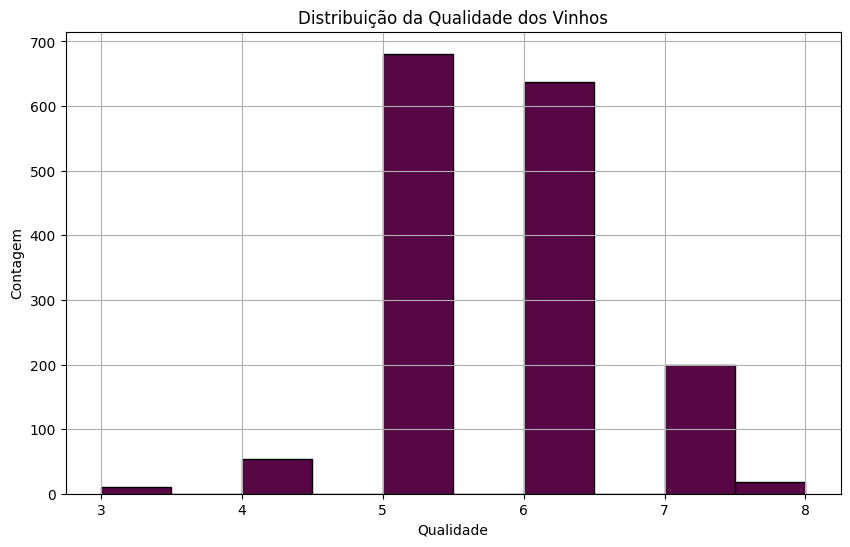

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['quality'], bins=10,color='#570844', edgecolor='k')
plt.title('Distribuição da Qualidade dos Vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

# Gráfico de dispersão para analisar a relação entre a acidez volátil e a qualidade do vinho

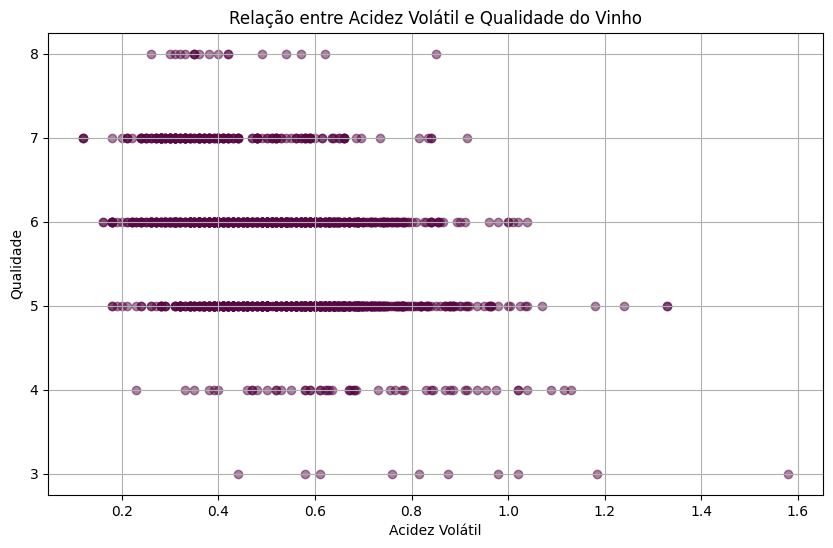

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['volatile acidity'], df['quality'],color='#570844', alpha=0.5)
plt.title('Relação entre Acidez Volátil e Qualidade do Vinho')
plt.xlabel('Acidez Volátil')
plt.ylabel('Qualidade')
plt.grid(True)
plt.show()

# O gráfico acima ajuda a visualizar se existe uma correlação entre a acidez volátil e a qualidade do vinho.

# Uma proposta de melhoria seria, reduzir a acidez volátil, o que pode potencialmente melhorar a qualidade do vinho.

# Link para o Dataset: https://github.com/GbMattos/TrabalhoBigData